<a href="https://colab.research.google.com/github/KrisDA-1/NU_Pandas/blob/main/BD_Hypothesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hypothesis 1: building_size_m2 vs. Energy Cost

###Ho: There is **no** relationship between building_size_m2 and energy cost.

###H1: There is a relationship between building_size_m2 and energy cost

Target: energy_cost_brl,
Dependent: energy_cost_brl,
Independent: customer_type

#Hypothesis 2: Occupants vs. Energy Cost

###Ho: Mean energy cost is the same despite amount of occupants.

###H1: Mean energy cost differs according to amount of occupants.

Target: energy_cost_brl,
Dependent: energy_cost_brl,
Independent: occupants

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go
import plotly.express as px
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scipy.stats as stats
from numpy import median
from numpy import std

from scipy import stats


In [2]:
df = pd.read_csv('energy_consumption.csv')
df.head()

,customer_id,customer_type,regions,building_size_m2,occupants,energy_cost_brl
0,CUSTOMER_0001,residential,Northeast,24,2,64.51
1,CUSTOMER_0002,commercial,Midwest,24,1,55.26
2,CUSTOMER_0003,commercial,Southeast,24,1,74.54
3,CUSTOMER_0004,residential,Northeast,45,4,147.06
4,CUSTOMER_0005,residential,Southeast,45,4,143.06


In [3]:
df.shape

(5000, 6)

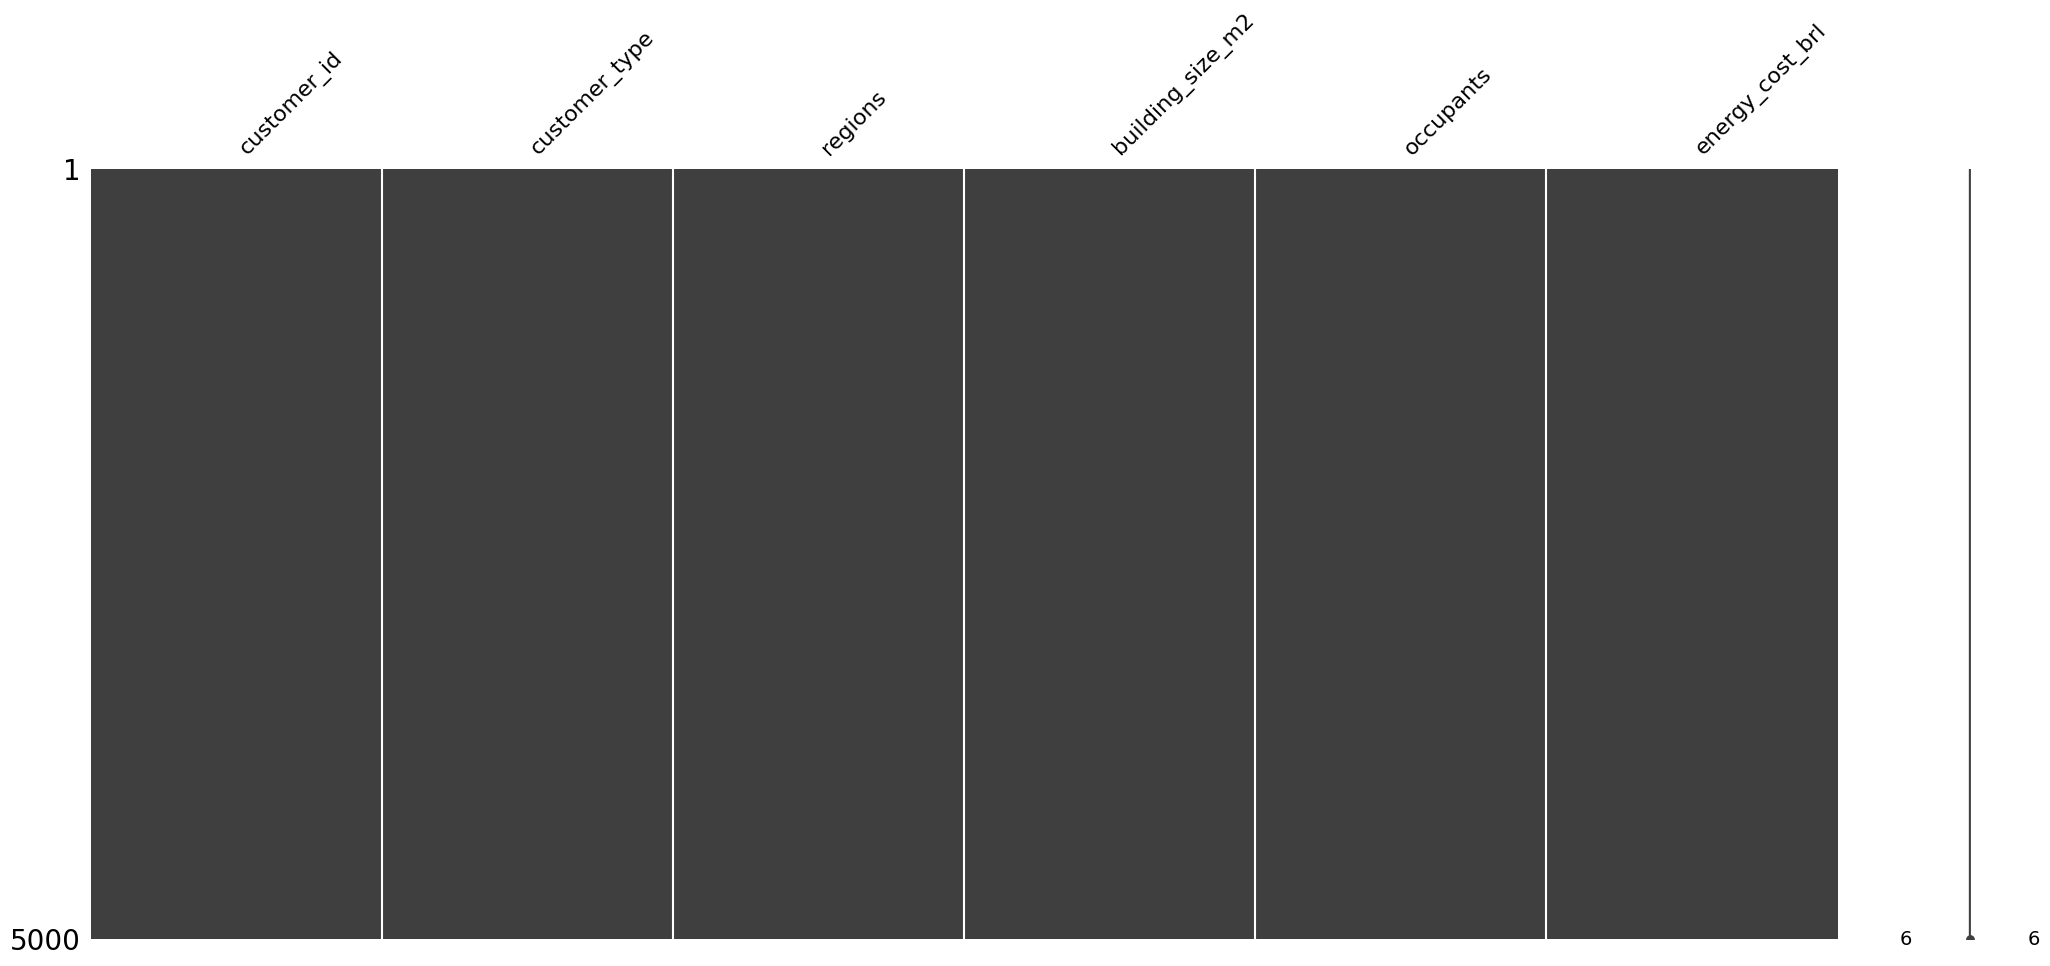

In [4]:
##Visualize the general missing values of data
msno.matrix(df)
plt.show()

In [5]:
##Missing values
missing_values = df.isnull().sum()
print(missing_values)

customer_id         0
customer_type       0
regions             0
building_size_m2    0
occupants           0
energy_cost_brl     0
dtype: int64


In [6]:
missingvalues = df.isnull().sum()
print(missingvalues.loc[missingvalues!=0], '\n')

Series([], dtype: int64) 



In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       5000 non-null   object 
 1   customer_type     5000 non-null   object 
 2   regions           5000 non-null   object 
 3   building_size_m2  5000 non-null   int64  
 4   occupants         5000 non-null   int64  
 5   energy_cost_brl   5000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 234.5+ KB
None


In [8]:
pd.options.display.float_format = "{:.2f}".format
df.describe()

,building_size_m2,occupants,energy_cost_brl
count,5000.00,5000.00,5000.00
mean,39.58,2.30,86.87
std,17.52,1.03,24.38
min,17.00,1.00,52.52
25%,24.00,1.00,68.56
50%,45.00,2.00,83.72
75%,45.00,3.00,98.24
max,77.00,4.00,158.61


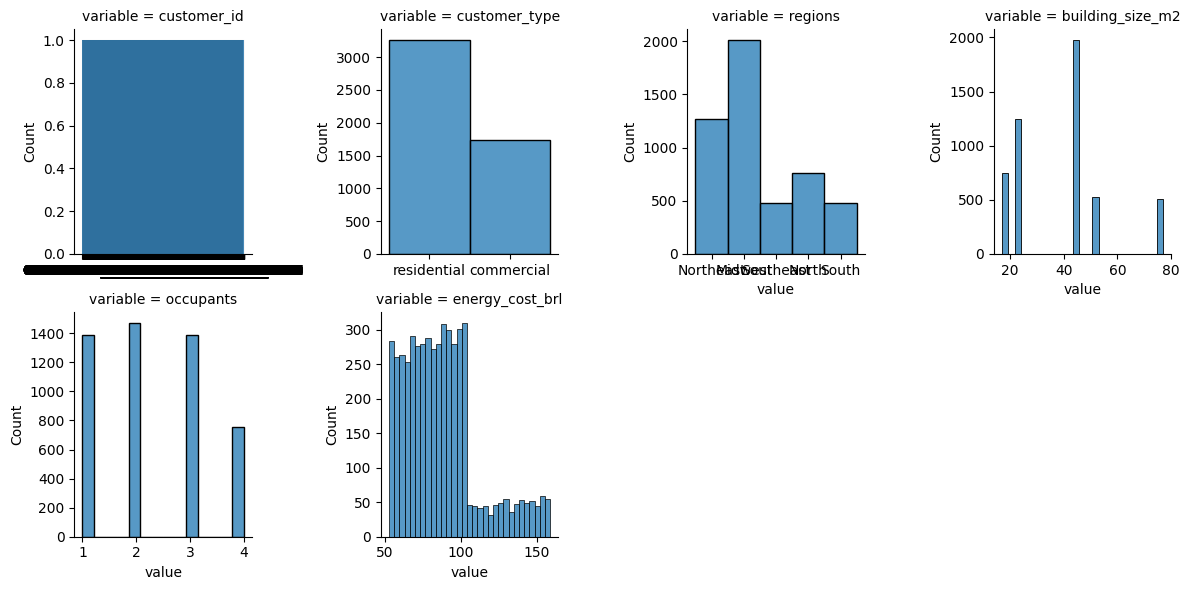

In [9]:
df = pd.DataFrame(data=df, columns=['customer_id','customer_type','regions','building_size_m2','occupants','energy_cost_brl'])

nd = pd.melt(df, value_vars =df )
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.histplot, 'value')
n1

<Axes: ylabel='energy_cost_brl'>

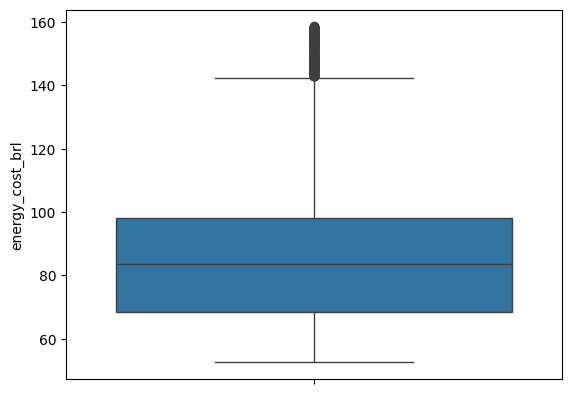

In [10]:
sns.boxplot(data = df['energy_cost_brl'])

In [11]:
df_for_box_plot = df[['occupants','building_size_m2']].copy()

fig = px.box(df_for_box_plot.melt(), y="value", facet_col="variable",facet_col_wrap=2, boxmode="overlay", color="variable",height=1000, width=900)
fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(showlegend=False)
fig.update_xaxes(showline=True, linewidth=2, linecolor='grey')
fig.update_yaxes(showline=True, linewidth=2, linecolor='grey')

fig.show()

In [12]:
# We remove the only outlier in our dataset before handling missing values
# Reset df to its original full state to ensure all columns are present
df = pd.read_csv('energy_consumption.csv')
dataset = df.drop(df[df['occupants']> 75].index).reset_index(drop=True)
dataset

,customer_id,customer_type,regions,building_size_m2,occupants,energy_cost_brl
0,CUSTOMER_0001,residential,Northeast,24,2,64.51
1,CUSTOMER_0002,commercial,Midwest,24,1,55.26
2,CUSTOMER_0003,commercial,Southeast,24,1,74.54
3,CUSTOMER_0004,residential,Northeast,45,4,147.06
4,CUSTOMER_0005,residential,Southeast,45,4,143.06
...,...,...,...,...,...,...
4995,CUSTOMER_4996,commercial,Southeast,45,4,146.67
4996,CUSTOMER_4997,residential,Southeast,24,1,72.91
4997,CUSTOMER_4998,residential,South,17,2,72.22
4998,CUSTOMER_4999,commercial,Northeast,45,2,86.28


In [13]:
# Remove outliers based on 'building_size_m2' from the 'dataset' DataFrame
# 'dataset' should now contain all original columns from the previous step.
dataset = dataset.drop(dataset[dataset['building_size_m2']> 75].index).reset_index(drop=True)
dataset

,customer_id,customer_type,regions,building_size_m2,occupants,energy_cost_brl
0,CUSTOMER_0001,residential,Northeast,24,2,64.51
1,CUSTOMER_0002,commercial,Midwest,24,1,55.26
2,CUSTOMER_0003,commercial,Southeast,24,1,74.54
3,CUSTOMER_0004,residential,Northeast,45,4,147.06
4,CUSTOMER_0005,residential,Southeast,45,4,143.06
...,...,...,...,...,...,...
4486,CUSTOMER_4996,commercial,Southeast,45,4,146.67
4487,CUSTOMER_4997,residential,Southeast,24,1,72.91
4488,CUSTOMER_4998,residential,South,17,2,72.22
4489,CUSTOMER_4999,commercial,Northeast,45,2,86.28


####Visual Exploratory Data Analysis

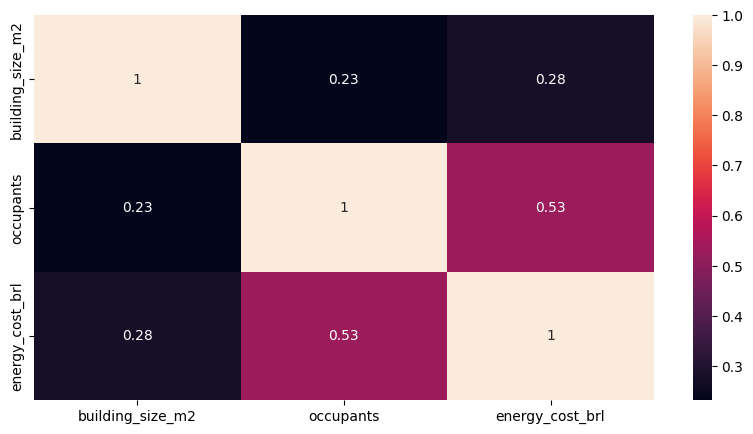

In [14]:
#Plot a correlation Matrix to show correlation coefficients between out variables
###This plot visually represents how strongly different numerical features in your dataset are related to each other.
plt.figure(figsize=(10,5))
sns.heatmap(dataset.select_dtypes(include=['number']).corr(),annot=True)
plt.show()

In [15]:
#Retrieve unique values from a column
uniquevalues_building = df["building_size_m2"].unique()
print(uniquevalues_building)

[24 45 52 17 77]


In [16]:
#Building size distribution by energy cost
df_for_plot = dataset[['building_size_m2','energy_cost_brl']]
category_orders={"building_size_m2":[24,45,52,17,77]}
fig = px.histogram(df_for_plot, x="building_size_m2",y="energy_cost_brl",  histfunc='avg',category_orders=category_orders)
fig.show()

###>>>Correlation analysis

#####If the x-variable has only 4 distinct values, the linear relationship is going to be very weak or misleading. A correlation calculation (Pearson r or linear regression) will be almost useless because correlation assumes continuous variation in both variables.
#####So we are going to use

In [17]:
#Correlation between Building size and energy cost using Boxplot
###R//This show larger buildings have systematically higher energy costs.
fig = px.box(dataset, x='building_size_m2', y='energy_cost_brl')
fig.show()

In [18]:
##Median Comparison
###R//This tells us whether bigger buildings really cost more on average.
dataset.groupby('building_size_m2')['energy_cost_brl'].mean()

,energy_cost_brl
building_size_m2,
17,79.27
24,78.61
45,93.19
52,92.13


In [19]:
#Retrieve unique values from a column
uniquevalues_building = df["occupants"].unique()
print(uniquevalues_building)

[2 1 4 3]


In [20]:
#Ocupants distribution by energy cost
df_for_plot = dataset[['occupants','energy_cost_brl']]
category_orders={"occupants":[2,1,4,3]}
fig = px.histogram(df_for_plot, x="occupants",y="energy_cost_brl",  histfunc='avg',category_orders=category_orders)
fig.show()

In [21]:
#Correlation between Ocupants and energy cost using Boxplot
###R//This show the more occupants have systematically higher energy costs.
fig = px.box(dataset, x='occupants', y='energy_cost_brl')
fig.show()

In [22]:
##Median Comparison
###R//This tells us whether 4 occupants really cost more on average.
dataset.groupby('occupants')['energy_cost_brl'].mean()

,energy_cost_brl
occupants,
1,79.11
2,79.16
3,78.53
4,132.44


In [25]:
#Customer type by Regions (just for review, not related to our hypotheses)
fig = px.histogram(dataset,
                   x='regions',
                   marginal='box',
                   color='customer_type',
                   color_discrete_sequence=['blue', 'green'],
                   title='Energy cost by regions by customer type')
fig.update_layout(bargap=0.1)
fig.show()

###>>>Statistical Hypothesis Testing

#####None of our chosen variables appear to follow a normal (Gaussian) distribution

#####Occupants: Each value appears with high frequency, discrete categorical (multimodal spikes) and not suitable for normality tests or correlation assumptions.

#####building_size_m2: Clear multimodal distribution with few categories, big vertical spikes mean repeated values

#####energy_cost_brl: It is right-skewed (long tail to the right), most values cluster between 80–120, then a tail up to 160+

Since our variables are non-normal and skewed we will use spearman correlation

In [30]:
#We will treat our variables as categorical and perform Spearman Correlation
##Evaluate the strenght of the monotonic relationship.

dataset.select_dtypes(include=['number']).corr(method='spearman')


,building_size_m2,occupants,energy_cost_brl
building_size_m2,1.00,0.20,0.20
occupants,0.20,1.00,0.38
energy_cost_brl,0.20,0.38,1.00


######$\rho = 0.38$ --- Moderate Positive Monotonic Relationship: A consistent tendency for energy cost to increase as the rank of the number of occupants increases.

######$\rho = 0.20$ --- Weak Positive Monotonic Relationship: A slight, consistent tendency for energy cost to increase as the rank of the building size increases.

In [32]:
##Spearman Correlation and P-value (Occupants and energy consumption)
from scipy.stats import spearmanr
x = dataset['occupants']
y = dataset['energy_cost_brl']
corr, p_value = spearmanr(x, y)

print("Spearman correlation (Occupants vs. Energy Cost):")
print(f"Correlation: {corr:.2f}")
print(f"p-value: {p_value:.3f}")


Spearman correlation (Occupants vs. Energy Cost):
Correlation: 0.38
p-value: 0.000


In [33]:
##Spearman Correlation and P-value (Occupants and energy consumption)
from scipy.stats import spearmanr
x = dataset['building_size_m2']
y = dataset['energy_cost_brl']
corr, p_value = spearmanr(x, y)

print("Spearman correlation (building_size_m2 vs. Energy Cost):")
print(f"Correlation: {corr:.2f}")
print(f"p-value: {p_value:.3f}")

Spearman correlation (building_size_m2 vs. Energy Cost):
Correlation: 0.20
p-value: 0.000


#>>>Result

*   Both relationships are statistically significant (p < 0.001)
*   Both relationships are positive.
*   The relationship between the First Variable Pair ($\rho=0.38$) is stronger than the relationship between the Second Variable Pair ($\rho=0.20$).





#>>>Hypotheses



1.   First hypothesis — building size

*   Reject H₀ (p < .001).
*   Spearman’s rank-order correlation indicated a significant, moderate positive association between building size (m²) and energy cost, ρ = .38, p < .001.
*   Larger buildings tend to have higher energy costs, but is not a large effect


2.   Second hypothesis — occupants

*   Reject H₀ (p < .001).
*   Spearman’s ρ = .20, p < .001, indicating a weak but statistically significant positive association between number of occupants and energy cost.
*   A weak positive association, as occupant count increases, energy cost tends to increase slightly.



